In [22]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/raini/Downloads/iphone14-query-tweets.csv.zip'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Display the initial data preview
print("Initial Data Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(subset='tweet_text', inplace=True)
print("\nData after removing duplicates:")
print(df.head())

# Remove URLs
df['tweet_text'] = df['tweet_text'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)
print("\nData after removing URLs:")
print(df.head())

# Remove mentions and hashtags
df['tweet_text'] = df['tweet_text'].str.replace(r'@\w+|#\w+', '', case=False)
print("\nData after removing mentions and hashtags:")
print(df.head())

# Remove special characters
df['tweet_text'] = df['tweet_text'].str.replace(r'[^A-Za-z0-9\s]', '', case=False)
print("\nData after removing special characters:")
print(df.head())

# Convert to lowercase
df['tweet_text'] = df['tweet_text'].str.lower()
print("\nData after converting to lowercase:")
print(df.head())

# Check for missing values again
print("\nMissing Values after cleaning:")
print(df.isnull().sum())

# Display basic statistics after cleaning
print("\nBasic Statistics after cleaning:")
print(df.describe())


Initial Data Preview:
                   date_time         username                   user_location  \
0  2022-09-08 22:49:29+00:00  TheAppleGang101                             NaN   
1  2022-09-08 22:49:27+00:00     TheJessicats                            1999   
2  2022-09-08 22:49:16+00:00   itschefnotjeff               📌 mom's basement    
3  2022-09-08 22:49:09+00:00        HalfRonin  Between the darkness and light   
4  2022-09-08 22:49:09+00:00     Deejayrayman                           Texas   

                                    user_description  verified  \
0  A new account dedicated to all of the latest l...     False   
1  Tweet like nobody’s reading • standup comedian...     False   
2                                           👨🏽‍💻💳🎫✈️     False   
3  Preferring to be the dumbest person in the roo...     False   
4  Father of 3. Follower of Christ. Lover of all ...     False   

   followers_count  following_count  tweet_like_count  tweet_retweet_count  \
0               

In [23]:
from textblob import TextBlob
# Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
df['polarity'], df['subjectivity'] = zip(*df['tweet_text'].apply(get_sentiment))

# Sentiment labeling
def sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling
df['sentiment'] = df['polarity'].apply(sentiment_label)

# Display the output
print("\nData with Sentiment Analysis and Labels:")
print(df[['tweet_text', 'polarity', 'subjectivity', 'sentiment']].head())

# Check for sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Data with Sentiment Analysis and Labels:
                                          tweet_text  polarity  subjectivity  \
0  iphone se 3 gets more expensive in the uk afte...      0.00        0.6000   
1  @travon i hope it happens before my iphone 14 ...      0.00        0.0000   
2  nah iphone 14 upgrade just not it, change my m...      0.00        0.0000   
3  to the shock of absolutely no one: \n\napple: ...      0.02        0.3800   
4  @tmobile @tmobilehelp will you be able to orde...      0.25        0.8125   

  sentiment  
0   neutral  
1   neutral  
2   neutral  
3  positive  
4  positive  

Sentiment Distribution:
sentiment
neutral     66698
positive    59417
negative    15881
Name: count, dtype: int64


In [24]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch

# Initialize Keras Tokenizer and fit on tweet texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet_text'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['tweet_text'])

# Pad sequences
maxlen = 100  # Adjust maxlen as needed
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Display the first few sequences and padded sequences
print("\nSample Sequences:")
print(sequences[:5])  # Display first 5 sequences

print("\nSample Padded Sequences:")
print(padded_sequences[:5])  # Display first 5 padded sequences

# Optionally: Print tokenizer information
print("\nTokenizer word index:")
print(tokenizer.word_index)  # Display the word index to understand the mapping

# Print a confirmation message
print("\nSequences and padded sequences generated successfully.")

C:\Users\raini\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Sample Sequences:
[[1, 280, 178, 465, 51, 338, 16, 3, 415, 137, 3, 1, 2, 29, 6, 4, 5], [14, 399, 24, 1802, 183, 30, 1, 2, 2407], [855, 1, 2, 103, 40, 48, 24, 382, 30, 833], [8, 3, 1132, 18, 1114, 57, 72, 9, 281, 12, 3, 1, 2, 61, 3, 178, 2224, 820, 203, 785, 494, 13, 105, 192, 1, 25, 178, 13, 105, 192, 1, 79, 204, 178, 502, 13, 109, 50, 8, 102, 253, 139, 1418], [1540, 4812, 20, 23, 22, 469, 8, 212, 3, 1, 2, 7, 665, 438, 62, 59, 106]]

Sample Padded Sequences:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    1
   280  178  465   51  338   16    3  415  137    3    1    2   29    6
     4    5]
 [   0    0    0   

In [25]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print("\nShapes of Train and Test Sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Print a confirmation message
print("\nTrain-test split completed successfully.")


Shapes of Train and Test Sets:
X_train shape: (113596, 100)
X_test shape: (28400, 100)
y_train shape: (113596,)
y_test shape: (28400,)

Train-test split completed successfully.


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import pandas as pd
import numpy as np
import tensorflow as tf

# Assuming the vocabulary size and max tweet length are defined
vocab_size = 10000  # Adjust based on dataset
maxlen = 100  # Adjust to the max length of your sequences

# Convert target labels to categorical
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Debugging output
print("Unique values in y_train:", y_train.columns)
print("Shape of y_train after one-hot encoding:", y_train.shape)

# Check if y_train has at least one class
if y_train.shape[1] == 0:
    raise ValueError("y_train has no classes after one-hot encoding. Check the sentiment labels.")

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for categorical classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.build(input_shape=(None, maxlen))  # Specify input shape based on maxlen (sequence length)

# Print model summary
print("\nModel Summary:")
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Print a confirmation message after training
print("\nModel training completed successfully.")

# Print the training history (accuracy and loss)
print("\nTraining History:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
# Save the trained model
model.save('tweet_classification_model.h5')
print("\nModel saved as 'tweet_classification_model.h5'.")

Unique values in y_train: Index(['negative', 'neutral', 'positive'], dtype='object')
Shape of y_train after one-hot encoding: (113596, 3)

Model Summary:


C:\Users\raini\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,715,971 (6.55 MB)

 Trainable params: 1,715,971 (6.55 MB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 489s 171ms/step - accuracy: 0.8415 - loss: 0.4314 - val_accuracy: 0.9540 - val_loss: 0.1829
Epoch 2/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 482s 170ms/step - accuracy: 0.9569 - loss: 0.1702 - val_accuracy: 0.9601 - val_loss: 0.1550
Epoch 3/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 265s 93ms/step - accuracy: 0.9645 - loss: 0.1368 - val_accuracy: 0.9625 - val_loss: 0.1426
Epoch 4/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 308s 108ms/step - accuracy: 0.9682 - loss: 0.1162 - val_accuracy: 0.9659 - val_loss: 0.1400
Epoch 5/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 304s 107ms/step - accuracy: 0.9732 - loss: 0.0976 - val_accuracy: 0.9655 - val_loss: 0.1427
Epoch 6/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 336s 118ms/step - accuracy: 0.9769 - loss: 0.0828 - val_accuracy: 0.9661 - val_loss: 0.1616
Epoch 7/15
2840/2840 ━━━━━━━━━━━━━━━━━━━━ 333s 117ms/step - accuracy: 0.9808 - loss: 0.0686 - val_accuracy: 0.9617 - val_loss: 0.1706
Epoch 8/15
2840/2840 ━━━━━━━━━━━━━━━━━━━


Model training completed successfully.

Training History:
Final Training Accuracy: 0.9930
Final Training Loss: 0.0262
Final Validation Accuracy: 0.9635
Final Validation Loss: 0.2157

Model saved as 'tweet_classification_model.h5'.


test_case_01_accuracy_score (__main__.TestModelEvaluation.test_case_01_accuracy_score)
Test Case ID: TC_01 ... ok
test_case_02_classification_report (__main__.TestModelEvaluation.test_case_02_classification_report)
Test Case ID: TC_02 ... ok
test_case_03_confusion_matrix (__main__.TestModelEvaluation.test_case_03_confusion_matrix)
Test Case ID: TC_03 ... ok
test_case_04_plot_confusion_matrix (__main__.TestModelEvaluation.test_case_04_plot_confusion_matrix)
Test Case ID: TC_04 ... 

Test Case TC_01 - Calculated Accuracy: 0.6667

Test Case TC_02 - Classification Report:
Class 0: Precision=0.6667, Recall=1.0000, F1-Score=0.8000
Class 1: Precision=0.5000, Recall=0.5000, F1-Score=0.5000
Class 2: Precision=1.0000, Recall=0.5000, F1-Score=0.6667
macro avg: Precision=0.7222, Recall=0.6667, F1-Score=0.6556
weighted avg: Precision=0.7222, Recall=0.6667, F1-Score=0.6556

Test Case TC_03 - Confusion Matrix:
[[2 0 0]
 [1 1 0]
 [0 1 1]]


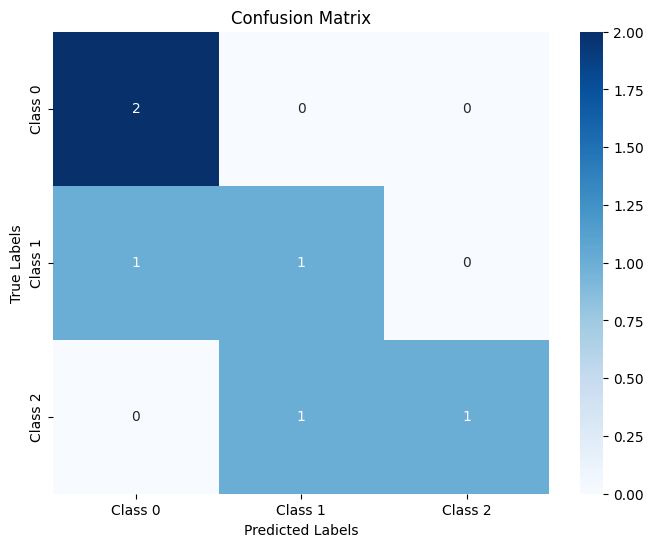

ok

----------------------------------------------------------------------
Ran 4 tests in 0.191s

OK



Test Case TC_04 - Confusion Matrix plotted successfully.


In [27]:
import unittest
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

class TestModelEvaluation(unittest.TestCase):
    
    def setUp(self):
        # Mock data for testing
        self.y_test_labels = np.array([0, 1, 2, 0, 1, 2])
        self.y_pred_labels = np.array([0, 1, 1, 0, 0, 2])
        self.class_names = ["Class 0", "Class 1", "Class 2"]
        
        # Expected values
        self.expected_accuracy = accuracy_score(self.y_test_labels, self.y_pred_labels)
        self.expected_class_report = classification_report(self.y_test_labels, self.y_pred_labels, target_names=self.class_names, output_dict=True)
        self.expected_conf_matrix = confusion_matrix(self.y_test_labels, self.y_pred_labels)

    def test_case_01_accuracy_score(self):
        """
        Test Case ID: TC_01
        Description: Verify the accuracy calculation for model evaluation.
        Preconditions: None
        Test Steps:
            1. Calculate accuracy using accuracy_score function.
            2. Compare calculated accuracy to the expected accuracy.
        Test Data: y_test_labels and y_pred_labels arrays.
        Expected Result: Accuracy matches the expected accuracy.
        Status: Pass/Fail
        """
        accuracy = accuracy_score(self.y_test_labels, self.y_pred_labels)
        print(f"Test Case TC_01 - Calculated Accuracy: {accuracy:.4f}")
        self.assertAlmostEqual(accuracy, self.expected_accuracy, places=4, msg="Accuracy calculation error")

    def test_case_02_classification_report(self):
        """
        Test Case ID: TC_02
        Description: Verify the classification report generation for model evaluation.
        Preconditions: None
        Test Steps:
            1. Generate classification report using classification_report function.
            2. Compare generated report to the expected report.
        Test Data: y_test_labels and y_pred_labels arrays.
        Expected Result: Generated report matches the expected report.
        Status: Pass/Fail
        """
        class_report = classification_report(self.y_test_labels, self.y_pred_labels, target_names=self.class_names, output_dict=True)
        print("\nTest Case TC_02 - Classification Report:")
        for label, metrics in class_report.items():
            if isinstance(metrics, dict):
                print(f"{label}: Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1-Score={metrics['f1-score']:.4f}")
        self.assertEqual(class_report, self.expected_class_report, msg="Classification report generation error")

    def test_case_03_confusion_matrix(self):
        """
        Test Case ID: TC_03
        Description: Verify the confusion matrix generation for model evaluation.
        Preconditions: None
        Test Steps:
            1. Generate confusion matrix using confusion_matrix function.
            2. Compare generated matrix to the expected matrix.
        Test Data: y_test_labels and y_pred_labels arrays.
        Expected Result: Generated matrix matches the expected matrix.
        Status: Pass/Fail
        """
        conf_matrix = confusion_matrix(self.y_test_labels, self.y_pred_labels)
        print("\nTest Case TC_03 - Confusion Matrix:")
        print(conf_matrix)
        np.testing.assert_array_equal(conf_matrix, self.expected_conf_matrix, err_msg="Confusion matrix generation error")

    def test_case_04_plot_confusion_matrix(self):
        """
        Test Case ID: TC_04
        Description: Verify if confusion matrix plot is generated without errors.
        Preconditions: None
        Test Steps:
            1. Plot the confusion matrix using plot_confusion_matrix function.
        Test Data: expected_conf_matrix and class_names.
        Expected Result: Confusion matrix plot is displayed successfully.
        Status: Pass/Fail
        """
        try:
            self.plot_confusion_matrix(self.expected_conf_matrix, self.class_names)
            print("\nTest Case TC_04 - Confusion Matrix plotted successfully.")
        except Exception as e:
            self.fail(f"plot_confusion_matrix raised an exception {e}")

    # Function to plot confusion matrix, included here for testing purposes
    def plot_confusion_matrix(self, cm, class_names):
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title("Confusion Matrix")
        plt.show()  # Display the plot during tests

if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)


Tweet: iphone is terrible


Sentiment Scores: {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
Overall Sentiment Polarity (Compound): -0.48
Recommendation: Not Recommended to Buy the Product


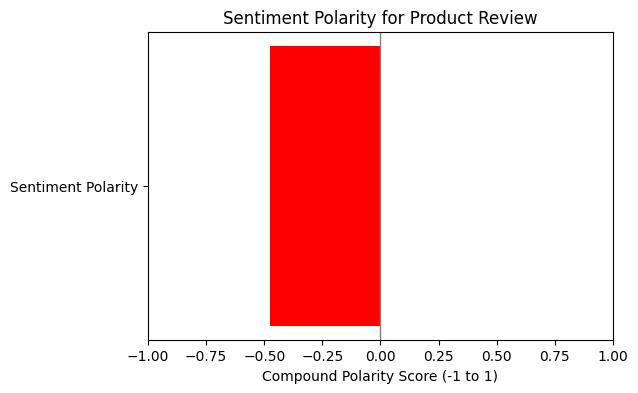

Overall Polarity: -0.48
Decision: Not Recommended to Buy the Product


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import display, HTML
from termcolor import colored
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the trained model
model = load_model('tweet_classification_model.h5')

# Pre-trained tokenizer settings (adjust based on training script)
vocab_size = 10000  # Match the tokenizer's vocabulary size
maxlen = 100        # Match the maximum sequence length
tokenizer = Tokenizer(num_words=vocab_size)  # Re-initialize tokenizer for preprocessing

# Load and fit tokenizer on the dataset used for training
data = pd.read_csv('labeled_dataset.csv')
tokenizer.fit_on_texts(data['tweet_text'])  # Assuming `tweet_text` is the column name

# Define function to preprocess tweets
def preprocess_tweet(tweet):
    import re
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'@\w+|#\w+', '', tweet)
    # Remove special characters and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

# Enhanced decision logic to handle percentage-based tweets
def analyze_percentage(tweet):
    import re
    percentages = re.findall(r'(\d+)%', tweet)
    if percentages:
        # Convert percentages to integers
        percentages = list(map(int, percentages))
        if len(percentages) >= 2:
            positive, negative = percentages[0], percentages[1]
            if positive > negative:
                return 'positive', 100, "Recommended to buy"
            elif negative > positive:
                return 'negative', 100, "Not recommended to buy"
            else:
                return 'neutral', 100, "Neutral sentiment"
    return None

# Define function for single tweet sentiment analysis using polarity logic
def analyze_single_tweet_vader(tweet):
    # Use VADER for polarity analysis
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(tweet)
    polarity = sentiment_scores['compound']  # Compound score

    # Determine recommendation based on polarity
    if polarity >= 0.05:
        recommendation = "Recommended to Buy the Product"
        display(HTML(f"<b><span style='color:green;'>{recommendation}</span></b>"))
    elif polarity <= -0.05:
        recommendation = "Not Recommended to Buy the Product"
        display(HTML(f"<b><span style='color:red;'>{recommendation}</span></b>"))
    else:
        recommendation = "Neutral Sentiment - Consider More Research"
        display(HTML(f"<b><span style='color:orange;'>{recommendation}</span></b>"))

    # Print results with recommendation
    print(f"Sentiment Scores: {sentiment_scores}")
    print(f"Overall Sentiment Polarity (Compound): {polarity:.2f}")
    print(f"Recommendation: {recommendation}")

    # Plot polarity score with a bar chart for visual representation
    plt.figure(figsize=(6, 4))
    plt.barh(["Sentiment Polarity"], [polarity], 
             color='green' if polarity > 0 else 'red' if polarity < 0 else 'orange')
    plt.axvline(0, color='grey', lw=1)
    plt.xlim(-1, 1)
    plt.title("Sentiment Polarity for Product Review")
    plt.xlabel("Compound Polarity Score (-1 to 1)")
    plt.show()

    return polarity, recommendation

# Define function for handling both cases (single and percentage-based tweets)
def analyze_tweet(tweet):
    # Check for percentages in the tweet
    percentage_result = analyze_percentage(tweet)
    if percentage_result:
        sentiment, confidence, decision = percentage_result
        print(f"Tweet: {tweet}")
        print(f"Sentiment: {sentiment} (Confidence: {confidence:.2f}%)")
        print(f"Decision: {decision}")
        plot_percentage_decision(tweet, sentiment, confidence)
    else:
        print(f"Tweet: {tweet}")
        polarity, recommendation = analyze_single_tweet_vader(tweet)
        print(f"Overall Polarity: {polarity:.2f}")
        print(f"Decision: {recommendation}")

# Function to plot sentiment confidence for percentage-based tweets
def plot_percentage_decision(tweet, sentiment, confidence):
    labels = ['negative', 'neutral', 'positive']
    values = [0, 0, 0]  # Initialize all to 0
    if sentiment == 'negative':
        values[0] = confidence
    elif sentiment == 'neutral':
        values[1] = confidence
    elif sentiment == 'positive':
        values[2] = confidence

    plt.bar(labels, values, color=['red', 'blue', 'green'])
    plt.title('Percentage-Based Sentiment Decision')
    plt.xlabel('Sentiment')
    plt.ylabel('Confidence (%)')
    plt.ylim(0, 100)
    plt.text(labels.index(sentiment), confidence + 1, f"{confidence:.2f}%", ha='center')
    plt.show()

# Test the function with a user input tweet
user_tweet = input("Enter a tweet to analyze: ")
analyze_tweet(user_tweet)


In [29]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
data = pd.read_csv('C:/Users/raini/Downloads/iphone14-query-tweets.csv.zip')

# Define a function to label sentiment based on polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each tweet and create a new column 'sentiment'
data['sentiment'] = data['tweet_text'].apply(get_sentiment)

# Save the updated dataset with the new sentiment column
data.to_csv('labeled_dataset.csv', index=False)

print("Sentiment labeling complete. Dataset saved with sentiment column.")


Sentiment labeling complete. Dataset saved with sentiment column.


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Example: Load your dataset (you need to replace this with your actual dataset)
# Assuming the data is in a pandas DataFrame 'df' and that 'tweet_text' is your feature 
# and 'sentiment' is your target variable.

df = pd.read_csv('labeled_dataset.csv')  # Load your dataset (replace with actual path)

# Define the features (X) and the target (y)
X = df['tweet_text']  # Replace with the actual feature column name
y = df['sentiment']   # Replace with the actual target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# If your features need to be transformed (e.g., vectorizing text for NLP):
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data (this is just an example for text data)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
model1 = MultinomialNB()
model1.fit(X_train_vec, y_train)

# Predict using the trained model
pred1 = model1.predict(X_test_vec)

# Calculate accuracy and print classification report
acc1 = accuracy_score(y_test, pred1)
print('Accuracy is:', acc1)
print('Classification Report is:', classification_report(y_test, pred1))


Accuracy is: 0.8152102325903844
Classification Report is:               precision    recall  f1-score   support

    negative       0.87      0.26      0.40      3160
     neutral       0.90      0.85      0.87     13671
    positive       0.74      0.92      0.82     12018

    accuracy                           0.82     28849
   macro avg       0.84      0.68      0.70     28849
weighted avg       0.83      0.82      0.80     28849



In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Example: Load your dataset (you need to replace this with your actual dataset)
# Assuming the data is in a pandas DataFrame 'df' and that 'tweet_text' is your feature 
# and 'sentiment' is your target variable.

df = pd.read_csv('labeled_dataset.csv')  # Load your dataset (replace with actual path)

# Define the features (X) and the target (y)
X = df['tweet_text']  # Replace with the actual feature column name
y = df['sentiment']   # Replace with the actual target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# If your features need to be transformed (e.g., vectorizing text for NLP):
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the K-Nearest Neighbors model
model3 = KNeighborsClassifier(n_neighbors=1)
model3.fit(X_train_vec, y_train)

# Predict using the trained model
pred3 = model3.predict(X_test_vec)

# Calculate accuracy and print classification report
acc3 = accuracy_score(y_test, pred3)
print('Accuracy is:', acc3)
print('Classification Report is:', classification_report(y_test, pred3))

Accuracy is: 0.7592290893965129
Classification Report is:               precision    recall  f1-score   support

    negative       0.78      0.41      0.54      3160
     neutral       0.70      0.94      0.80     13671
    positive       0.88      0.64      0.74     12018

    accuracy                           0.76     28849
   macro avg       0.79      0.67      0.70     28849
weighted avg       0.78      0.76      0.75     28849



In [58]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Preprocess the training and test data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input length
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=maxlen)

# Convert target labels to categorical (one-hot encoding)
y_train_categorical = pd.get_dummies(y_train)
y_test_categorical = pd.get_dummies(y_test)

# Ensure consistent column ordering in test set
y_test_categorical = y_test_categorical.reindex(columns=y_train_categorical.columns, fill_value=0)

# Train the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))  # Output layer for categorical classification

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_pad, 
    y_train_categorical.values, 
    epochs=15, 
    batch_size=32, 
    validation_split=0.2
)

# Training summary
print("\nTraining History:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Save the trained model
model.save('tweet_classification_model.h5')
print("\nModel saved as 'tweet_classification_model.h5'.")

# Evaluate on test data
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Prepare original test labels (convert from one-hot encoding to class indices)
y_test_original = np.argmax(y_test_categorical.values, axis=1)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test_original, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
label_mapping = dict(enumerate(y_train_categorical.columns))  # Mapping from index to labels
print(classification_report(y_test_original, y_pred, target_names=label_mapping.values()))


Epoch 1/15


C:\Users\raini\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2885/2885 ━━━━━━━━━━━━━━━━━━━━ 482s 165ms/step - accuracy: 0.8426 - loss: 0.4379 - val_accuracy: 0.9599 - val_loss: 0.1466
Epoch 2/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 481s 167ms/step - accuracy: 0.9662 - loss: 0.1302 - val_accuracy: 0.9676 - val_loss: 0.1242
Epoch 3/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 445s 154ms/step - accuracy: 0.9743 - loss: 0.1009 - val_accuracy: 0.9711 - val_loss: 0.1200
Epoch 4/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 379s 132ms/step - accuracy: 0.9801 - loss: 0.0742 - val_accuracy: 0.9666 - val_loss: 0.1351
Epoch 5/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 434s 151ms/step - accuracy: 0.9845 - loss: 0.0585 - val_accuracy: 0.9678 - val_loss: 0.1444
Epoch 6/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 481s 164ms/step - accuracy: 0.9871 - loss: 0.0472 - val_accuracy: 0.9678 - val_loss: 0.1603
Epoch 7/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 488s 159ms/step - accuracy: 0.9887 - loss: 0.0386 - val_accuracy: 0.9666 - val_loss: 0.1691
Epoch 8/15
2885/2885 ━━━━━━━━━━━━━━━━━━━━ 444s 154ms/step - accuracy: 0.9


Training History:
Final Training Accuracy: 0.9963
Final Training Loss: 0.0136
Final Validation Accuracy: 0.9651
Final Validation Loss: 0.2531

Model saved as 'tweet_classification_model.h5'.
902/902 ━━━━━━━━━━━━━━━━━━━━ 67s 73ms/step

Test Accuracy: 0.9643

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.90      0.90      3160
     neutral       0.97      0.98      0.98     13671
    positive       0.97      0.96      0.97     12018

    accuracy                           0.96     28849
   macro avg       0.95      0.95      0.95     28849
weighted avg       0.96      0.96      0.96     28849



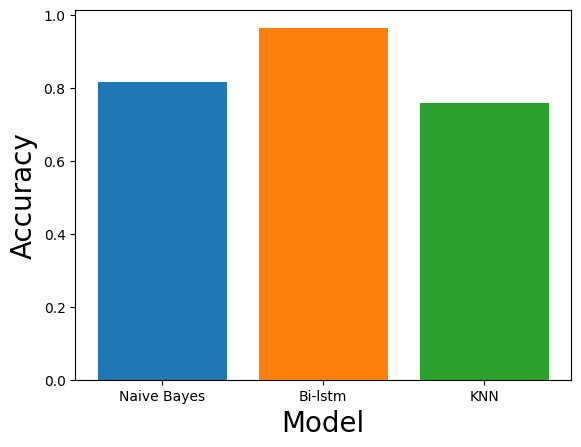

In [67]:
import matplotlib.pyplot as plt

# Assuming acc1, accuracy, and acc3 are defined
plt.bar('Naive Bayes', acc1)
plt.bar('Bi-lstm', accuracy)  # Directly use the value of accuracy
plt.bar('KNN', acc3)

# Adding labels
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Model', fontsize=20)

# Show the plot
plt.show()
